In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
G=nx.Graph()

In [20]:
G.add_nodes_from(["Arad","Bucharest"])


In [61]:
edges=[("Arad","Zerind",75),("Arad","Sibiu",140),("Arad","Timisoara",118),
       ("Bucharest","Fagaras",211)]

    


<Figure size 432x288 with 0 Axes>

In [47]:
for edge in edges:
    G.add_edge(edge[0],edge[1],weight=edge[2])

In [50]:
for edge in edges:
    print(edge)

('Arad', 'Zerind', 75)
('Arad', 'Sibiu', 140)
('Arad', 'Timisoara', 118)
('Bucharest', 'Fagaras', 211)


In [52]:
pos=nx.kamada_kawai_layout(G)
pos

{1: array([ 0.00896807, -0.00255559]),
 2: array([0.0053685, 0.0061394]),
 'Arad': array([-0.01957099,  0.12594957]),
 'Bucharest': array([-0.60574263,  0.60445697]),
 'Zerind': array([-0.34669095,  0.66742283]),
 'Sibiu': array([-0.64695515, -0.92163544]),
 'Timisoara': array([1.        , 0.12534284]),
 'Fagaras': array([ 0.60462316, -0.60512058])}

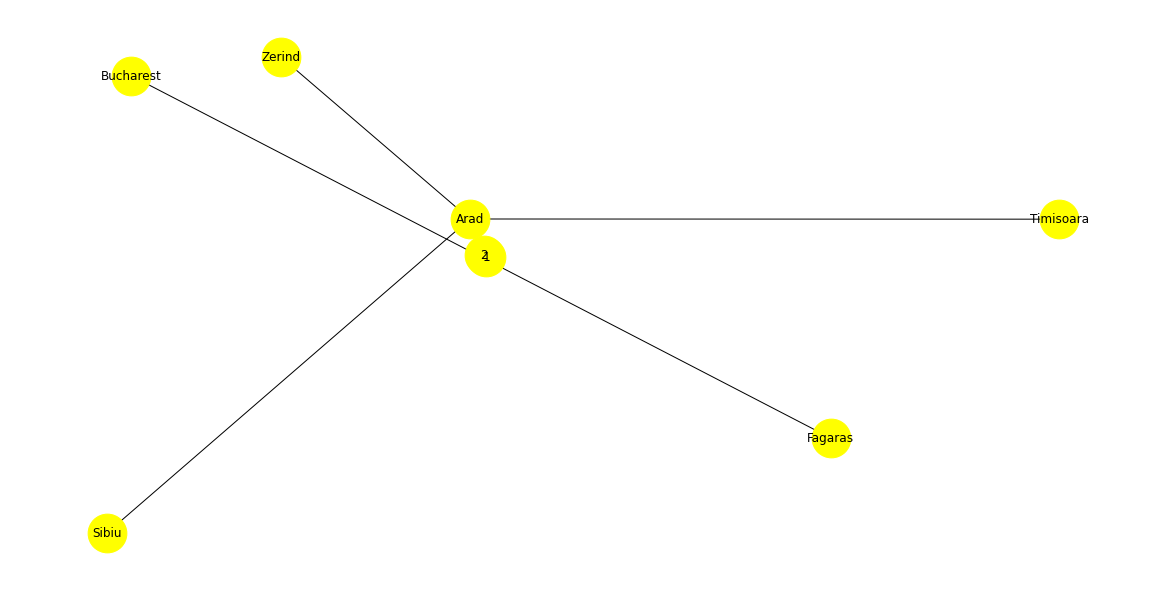

In [69]:
plt.figure(figsize=(16,8))
nx.draw(G,pos,with_labels=True,font_size=12,node_size=1500,node_color="yellow")

In [167]:
class Node:
    def __init__(self,state,parent=None,action=None):
        self.state=state
        self.parent=parent
        self.action=action

In [168]:
class StackFrontier():
    def __init__(self):
        self.frontier=[]
    def add(self,node):
        self.frontier.append(node)
    def contains_state(self,state):
        return any(node.state==state for node in self.frontier)
    def empty(self):
        return len(self.frontier)==0
    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node=self.frontier[-1]
            self.frontier=self.frontier[:-1]
            return node

In [173]:
# Define the frontier classes for BFS and DFS
class QueueFrontier:
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def remove(self):
        if self.frontier:
            return self.frontier.pop(0)
        else:
            raise Exception("Frontier is empty")

    def empty(self):
        return not self.frontier

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

In [182]:
# Define the search algorithms
def bfs_search(graph, start, goal):
    frontier = QueueFrontier()
    frontier.add(Node(state=start, parent=None, action=None))
    explored = set()
    while not frontier.empty():
        node = frontier.remove()
        explored.add(node.state)
        for neighbor, weight in graph[node.state].items():
            if neighbor not in explored and not frontier.contains_state(neighbor):
                child = Node(state=neighbor, parent=node, action=weight)
                if child.state == goal:
                    path = []
                    while child.parent is not None:
                        path.append({'state': child.state, 'weight': child.action})
                        child = child.parent
                    path.reverse()
                    return path
                frontier.add(child)
    return None

In [175]:
def dfs_search(graph,start,goal):
    frontier = StackFrontier()
    frontier.add(Node(state=start, parent=None, action=None))
    explored = set()
    while not frontier.empty():
        node = frontier.remove()
        explored.add(node.state)
        for neighbor, weight in graph[node.state].items():
            if neighbor not in explored and not frontier.contains_state(neighbor):
                child = Node(state=neighbor, parent=node, action=weight)
                if child.state == goal:
                    path = []
                    while child.parent is not None:
                        path.append({'state': child.state, 'weight': child.action})
                        child = child.parent
                    path.reverse()
                    return path
                frontier.add(child)
    return None

In [181]:
start = 'Arad'
goal = 'Bucharest'

# BFS
bfs_path = bfs_search(G, start, goal)
if bfs_path is None:
    print("SAD")
else:
    print("well")

SAD


In [183]:
# DFS
dfs_path = dfs_search(G, start, goal)
if dfs_path is None:
    print(f"No path found from {start} to {goal} using BFS")
else:
    dfs_cities = [start] + [step['state'] for step in dfs_path]
    dfs_weights = [step['weight'] for step in dfs_path]
    print(f"DFS path from {start} to {goal}:")
    print(list(zip(dfs_cities, dfs_weights)))

No path found from Arad to Bucharest using BFS
